In [18]:
#obtaining rough insitu vs exsitu bar graphs, and subhaloid of formations for counterrottating particles
#All subhalos of interest

import h5py
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import illustris_python as il

def hdf5_to_dict(file_path):
    data_dict = {}
    
    with h5py.File(file_path, 'r') as hdf_file:
        # Recursively traverse the HDF5 file and populate the dictionary
        def traverse(name, obj):
            if isinstance(obj, h5py.Dataset):
                data_dict[name] = obj[()]  # Store dataset value in dictionary
            elif isinstance(obj, h5py.Group):
                # Create a nested dictionary for groups
                group_dict = {}
                data_dict[name] = group_dict
                
                # Recursively visit the group's children
                obj.visititems(traverse)
        
        hdf_file.visititems(traverse)
    
    return data_dict

In [2]:
file_path = '/virgotng/universe/IllustrisTNG/L35n2160TNG/postprocessing/StellarAssembly/stars_099.hdf5'
data = hdf5_to_dict(file_path)

In [3]:
#interesting subhalos
subhaloid_list = [547844, 455291, 478216, 501208, 531910, 570319, 571633, 582137, 589496, 598112, 606820, 619381, 628949]
SubhaloID = subhaloid_list[0]

filename = 'tables/subhalo'
filename += str(SubhaloID)
filename += '.0.csv'

subhalo_df = pd.read_csv(filename)
data_contrarotante = data.copy()
data_contrarotante_df = pd.DataFrame(data_contrarotante)

In [4]:
#Sumando los dataframes
complete_data_df = subhalo_df.merge(data_contrarotante_df, left_on='ParticleIDs', right_on='ParticleID')
complete_data_df = complete_data_df.drop('ParticleIDs', axis=1)
complete_data_df.head()

,Unnamed: 0,M,x,y,z,Vx,Vy,Vz,Metallicity,U,...,Circularity,AccretionOrigin,AfterInfall,DistanceAtFormation,InSitu,MergerMassRatio,ParticleID,SnapNumAtFormation,SubfindID,SubfindIDAtFormation
0,0,53560.527344,0.029338,-0.018787,0.050264,-13.022654,39.013739,26.462412,0.946068,-248328.781250,...,0.109996,-1,-1,0.030847,1,-1.0,118896913475,29,547844,156714
1,1,49830.773438,-0.002267,0.034888,0.016861,-24.639224,66.195138,5.425658,2.148515,-248640.250000,...,0.086729,-1,-1,0.046789,1,-1.0,121068771044,31,547844,175661
2,2,49054.761719,0.156650,-0.127388,-0.002921,-35.227336,29.575495,8.363533,2.436078,-247214.484375,...,0.017779,-1,-1,0.081702,1,-1.0,122298304386,34,547844,199025
3,3,65541.531250,0.138966,-0.009450,0.024993,18.796672,49.023140,-20.606975,1.539409,-247484.671875,...,0.854392,-1,-1,0.013374,1,-1.0,118459758029,29,547844,156714
4,4,56322.742188,-0.079920,0.201489,-0.046180,-23.079251,-40.952395,-19.311553,1.249086,-246930.515625,...,0.597183,-1,-1,0.021731,1,-1.0,114774240464,24,547844,122728


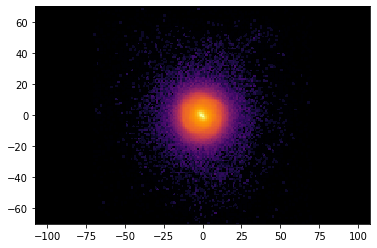

In [42]:
plt.hist2d(complete_data_df['x'],complete_data_df['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(),range=([-70,70],[-70,70]))
plt.axis('equal')
ax = plt.gca()
ax.set_facecolor('black')
plt.savefig('images/allparticle_%s'%SubhaloID)

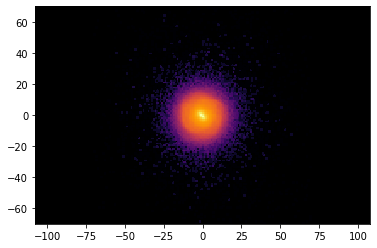

In [43]:
filtro_insitu = np.where(complete_data_df['InSitu'] == 1)[0]
complete_data_df_insitu = complete_data_df.copy()
complete_data_df_insitu = complete_data_df.loc[filtro_insitu]


plt.hist2d(complete_data_df_insitu['x'],complete_data_df_insitu['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(),range=([-70,70],[-70,70]))
plt.axis('equal')
ax = plt.gca()
ax.set_facecolor('black')
plt.savefig('images/insituparticle_%s'%SubhaloID)

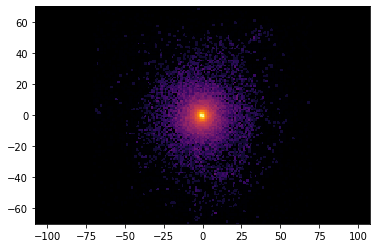

In [44]:
filtro_exsitu = np.where(complete_data_df['InSitu'] == 0)[0]
complete_data_df_exsitu = complete_data_df.copy()
complete_data_df_exsitu = complete_data_df.loc[filtro_exsitu]


plt.hist2d(complete_data_df_exsitu['x'],complete_data_df_exsitu['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(),range=([-70,70],[-70,70]))
plt.axis('equal')
ax = plt.gca()
ax.set_facecolor('black')
plt.savefig('images/exsituparticle_%s'%SubhaloID)

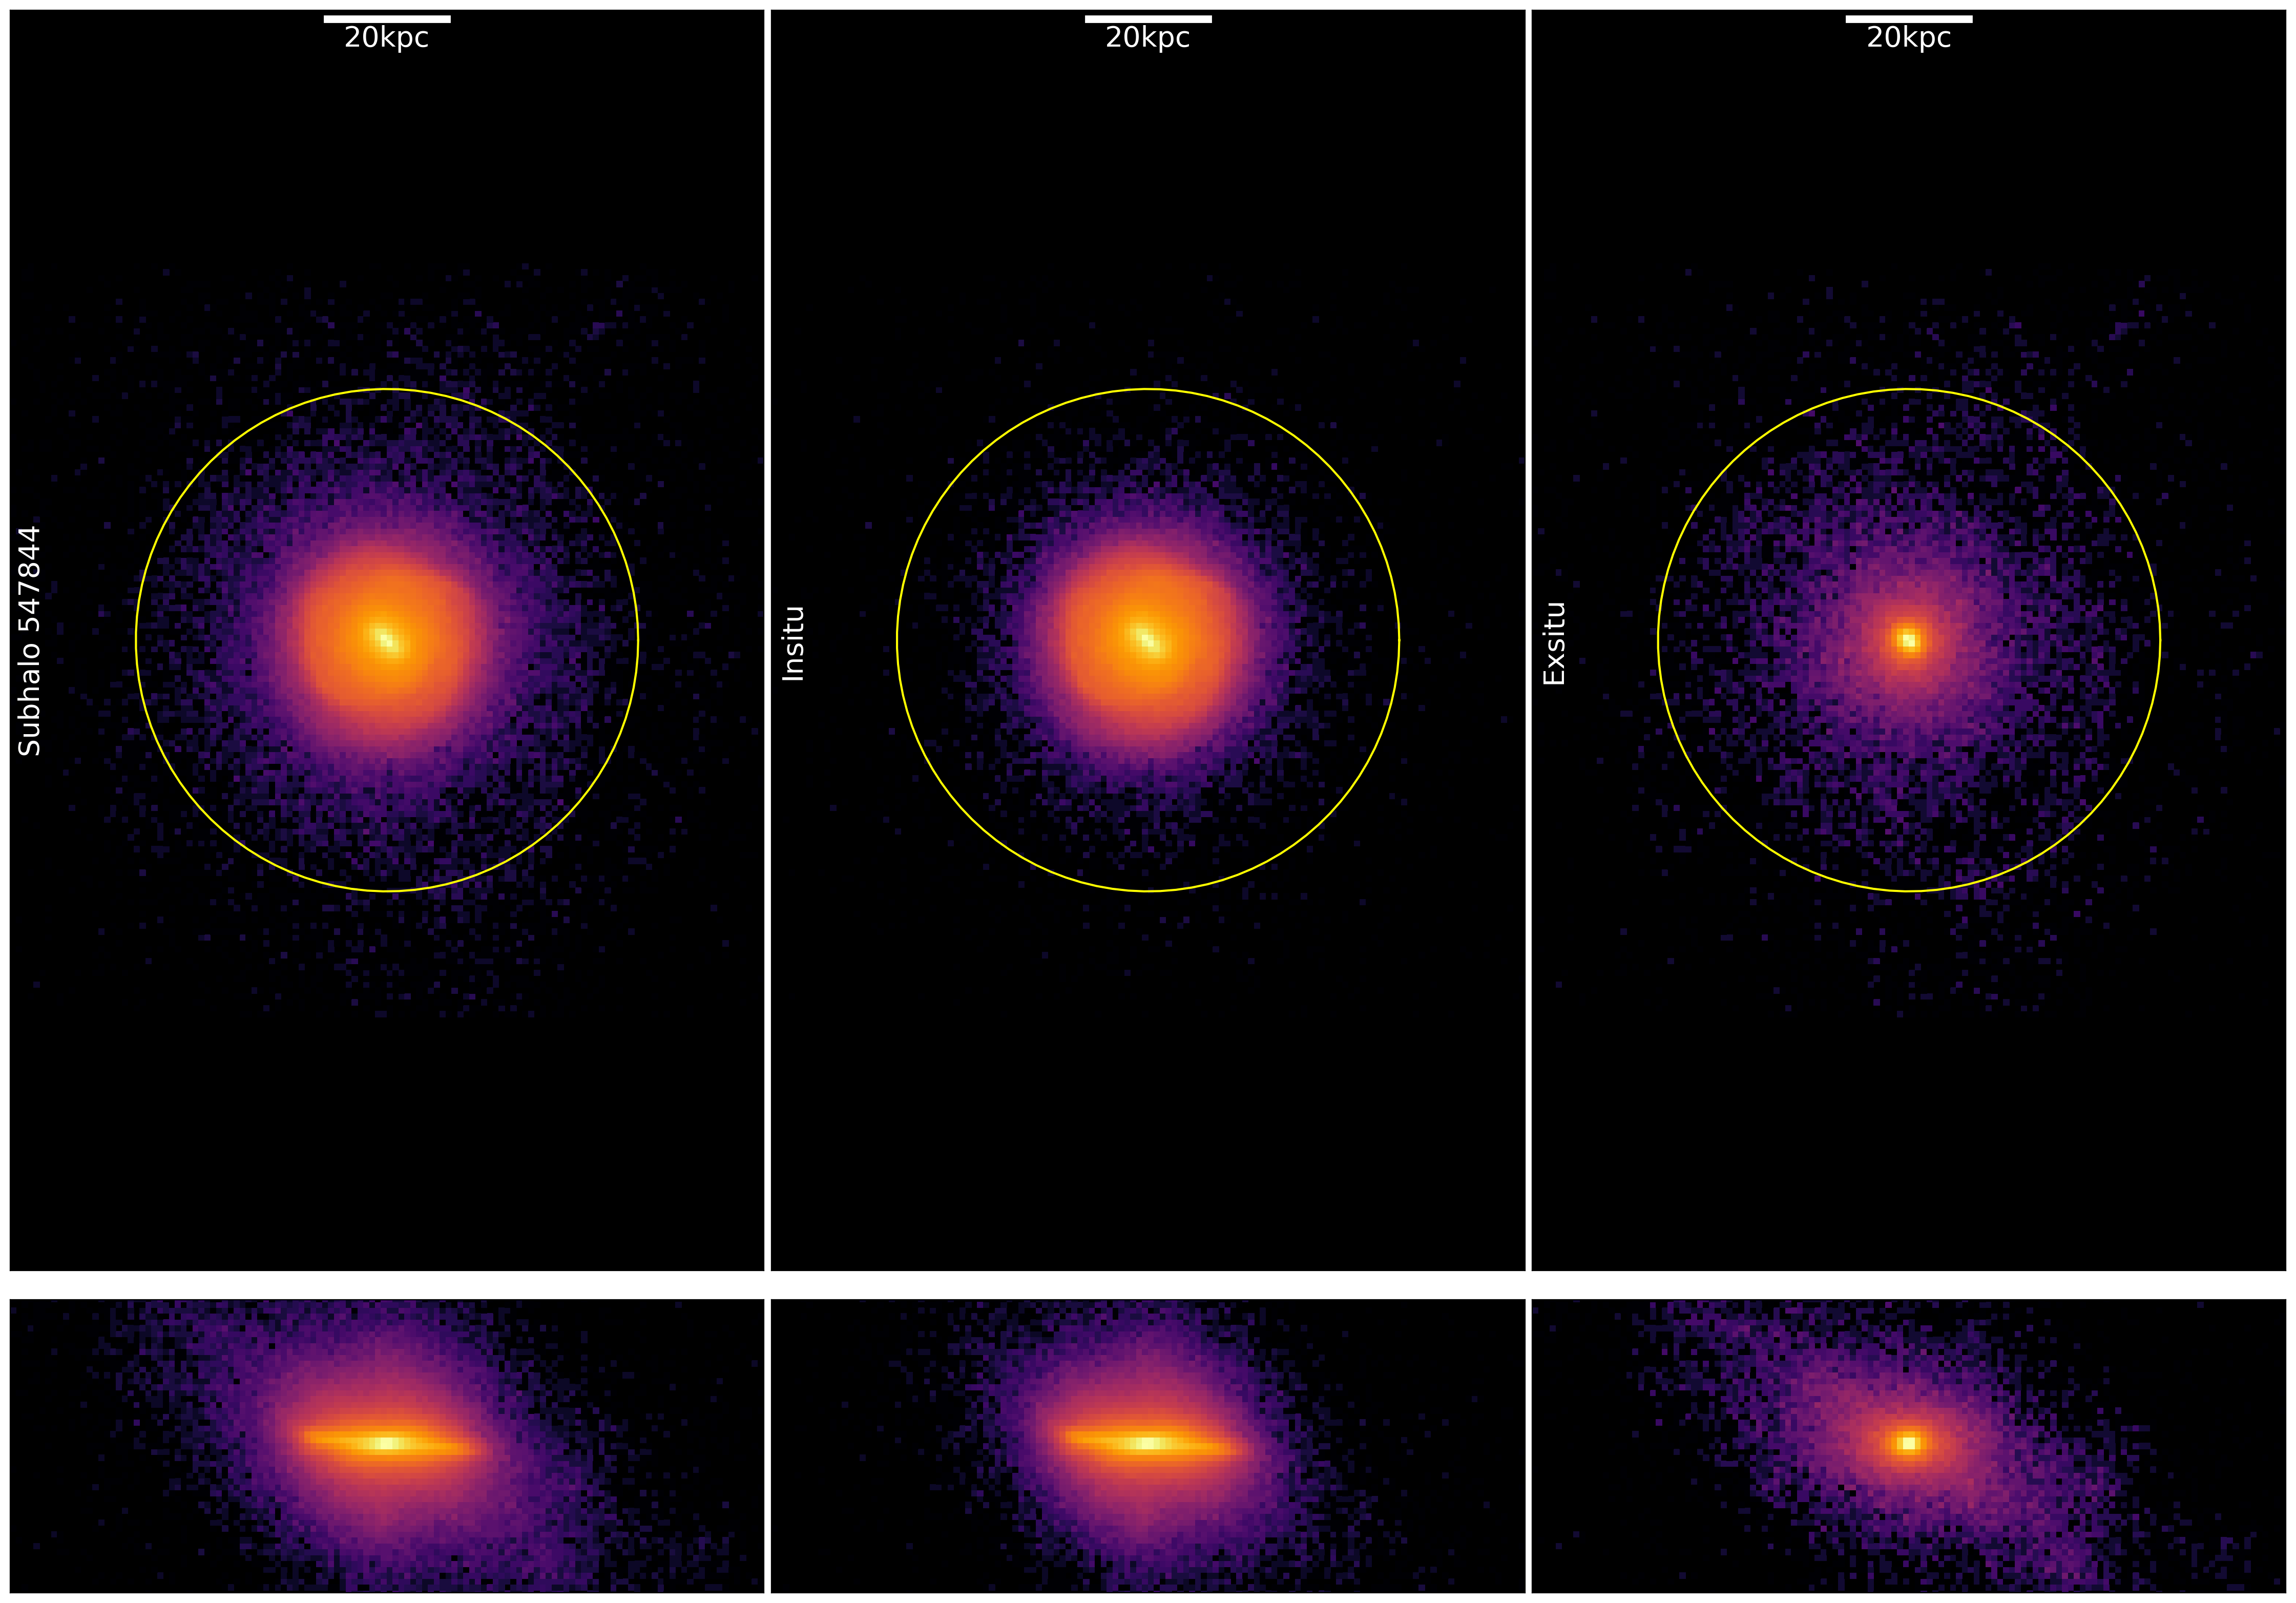

In [45]:


subhaloid = SubhaloID
R200 = 200

circle = np.linspace(0, 2 * np.pi, 100)
fraction_plot_size = 0.3

fig = plt.figure(figsize=(28.66, 20.46), dpi=200)
outer = gridspec.GridSpec(1, 3, wspace=0.01, hspace=0.01)
i = 0
subhalo_df = complete_data_df
inner = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)



ax = plt.Subplot(fig, inner[0:4])
histograma = ax.hist2d(subhalo_df['x'],subhalo_df['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
circulo_interior = ax.plot((0.2*R200) * np.cos(circle), (0.2*R200) * np.sin(circle), zorder=15, label='Subhalo %s'%int(subhaloid), color='yellow')
ax.axis('equal')
ax.set_facecolor('black')
xlocs = ax.get_xticks()
ylocs = ax.get_yticks()
textposx = (xlocs[1] + xlocs[0])/2
textposy = ylocs[-3]
escala_txt = str(int(xlocs[1] - xlocs[0]))
escala_txt += 'kpc'
fontprops = fm.FontProperties(size=20)
scalebar = AnchoredSizeBar(ax.transData, int(xlocs[1] - xlocs[0]), escala_txt, 'upper center', pad=0.1, color='white', frameon=False, size_vertical=1, fontproperties=fontprops)
ax.add_artist(scalebar)
ax.text(.01,0.5,'Subhalo %s'%int(subhaloid), transform=ax.transAxes, color='white', ha='left', va='center', rotation='vertical', size=20)
ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
fig.add_subplot(ax)

ax2 = plt.Subplot(fig, inner[4], sharex=ax)
histograma2 = ax2.hist2d(subhalo_df['x'],subhalo_df['z'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
ax2.axis('equal')
ax2.set_facecolor('black')
ax2.set(xlim=(-fraction_plot_size*R200, fraction_plot_size*R200), ylim=(-0.1*R200-1, 0.1*R200))
ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax2.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
fig.add_subplot(ax2)

i=1


filtro_insitu = np.where(complete_data_df['InSitu'] == 1)[0]
complete_data_df_insitu = complete_data_df.copy()
complete_data_df_insitu = complete_data_df.loc[filtro_insitu]
subhalo_df = complete_data_df_insitu
inner = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)



ax = plt.Subplot(fig, inner[0:4])
histograma = ax.hist2d(subhalo_df['x'],subhalo_df['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
circulo_interior = ax.plot((0.2*R200) * np.cos(circle), (0.2*R200) * np.sin(circle), zorder=15, label='Subhalo %s'%int(subhaloid), color='yellow')
ax.axis('equal')
ax.set_facecolor('black')
xlocs = ax.get_xticks()
ylocs = ax.get_yticks()
textposx = (xlocs[1] + xlocs[0])/2
textposy = ylocs[-3]
escala_txt = str(int(xlocs[1] - xlocs[0]))
escala_txt += 'kpc'
fontprops = fm.FontProperties(size=20)
scalebar = AnchoredSizeBar(ax.transData, int(xlocs[1] - xlocs[0]), escala_txt, 'upper center', pad=0.1, color='white', frameon=False, size_vertical=1, fontproperties=fontprops)
ax.add_artist(scalebar)
ax.text(.01,0.5,'Insitu', transform=ax.transAxes, color='white', ha='left', va='center', rotation='vertical', size=20)
ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
fig.add_subplot(ax)

ax2 = plt.Subplot(fig, inner[4], sharex=ax)
histograma2 = ax2.hist2d(subhalo_df['x'],subhalo_df['z'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
ax2.axis('equal')
ax2.set_facecolor('black')
ax2.set(xlim=(-fraction_plot_size*R200, fraction_plot_size*R200), ylim=(-0.1*R200-1, 0.1*R200))
ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax2.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
fig.add_subplot(ax2)

i=2

filtro_exsitu = np.where(complete_data_df['InSitu'] == 0)[0]
complete_data_df_exsitu = complete_data_df.copy()
complete_data_df_exsitu = complete_data_df.loc[filtro_exsitu]
subhalo_df = complete_data_df_exsitu
inner = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)



ax = plt.Subplot(fig, inner[0:4])
histograma = ax.hist2d(subhalo_df['x'],subhalo_df['y'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
circulo_interior = ax.plot((0.2*R200) * np.cos(circle), (0.2*R200) * np.sin(circle), zorder=15, label='Subhalo %s'%int(subhaloid), color='yellow')
ax.axis('equal')
ax.set_facecolor('black')
xlocs = ax.get_xticks()
ylocs = ax.get_yticks()
textposx = (xlocs[1] + xlocs[0])/2
textposy = ylocs[-3]
escala_txt = str(int(xlocs[1] - xlocs[0]))
escala_txt += 'kpc'
fontprops = fm.FontProperties(size=20)
scalebar = AnchoredSizeBar(ax.transData, int(xlocs[1] - xlocs[0]), escala_txt, 'upper center', pad=0.1, color='white', frameon=False, size_vertical=1, fontproperties=fontprops)
ax.add_artist(scalebar)
ax.text(.01,0.5,'Exsitu', transform=ax.transAxes, color='white', ha='left', va='center', rotation='vertical', size=20)
ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
fig.add_subplot(ax)

ax2 = plt.Subplot(fig, inner[4], sharex=ax)
histograma2 = ax2.hist2d(subhalo_df['x'],subhalo_df['z'],bins=128,cmap='inferno',norm=mpl.colors.LogNorm(), zorder=0,range=[[-fraction_plot_size*R200, fraction_plot_size*R200], [-fraction_plot_size*R200, fraction_plot_size*R200]])
ax2.axis('equal')
ax2.set_facecolor('black')
ax2.set(xlim=(-fraction_plot_size*R200, fraction_plot_size*R200), ylim=(-0.1*R200-1, 0.1*R200))
ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax2.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
fig.add_subplot(ax2)


fig.savefig('images/total_insitu_exsitu_%s.png'%subhaloid)